
# 🧪 Model Zoo: Comparative Evaluation of Classifiers

This notebook loads and evaluates multiple models (Logistic Regression, Random Forest, XGBoost, CatBoost),
optionally showing performance metrics and visualizations.

Set `ShowOutput = True` below to display plots.
## Included Models
- Logistic Regression
- Random Forest
- XGBoost
- CatBoost

Models are expected to be pre-trained in their respective notebooks.


In [1]:
ShowOutput = True

In [2]:

import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

c:\Users\Blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Best hyperparameters: {'n_estimators': 339, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'class_weight': 'balanced'}


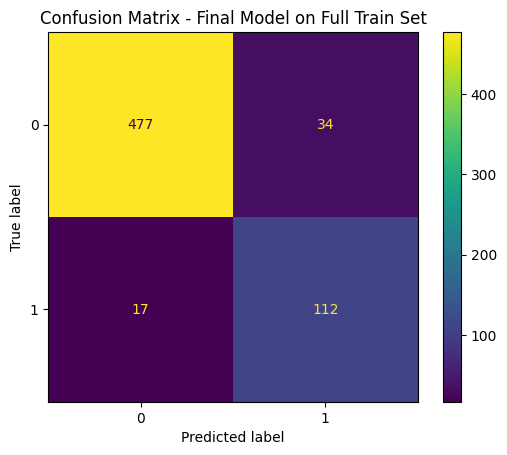

,Metric,Value
0,ROC AUC,0.9008
1,PR AUC,0.6926
2,F1 Score,0.8145
3,Matthews Corrcoef,0.7664
4,Accuracy,0.9203


In [3]:
%run SupervisedModels/OptimizedRandomForest.ipynb

## 📊 Optimized Random Forest Classifier Summary

This notebook trains and evaluates a **Random Forest classifier** to predict whether an individual is classified as having ASD based on various demographic and questionnaire-based features. The workflow includes preprocessing, hyperparameter tuning, and model evaluation, producing a high-performing, interpretable ensemble model.

### 🛠️ Key Components:
- **Preprocessing**: Handles missing values, scales numerical features, and performs SMOTE to address class imbalance.
- **Feature Set**: Excludes direct leakage from ASD score columns, focusing on valid demographic and behavioral features.
- **Hyperparameter Tuning**: Utilizes **Optuna** with cross-validation to find the optimal combination of:
  - Number of trees (`n_estimators`)
  - Tree depth (`max_depth`)
  - Minimum samples per leaf/split
  - Feature subset size (`max_features`)
  - Class weighting (`class_weight`)

- **Model**: `RandomForestClassifier` with the best parameters found via tuning.

---

### 🌲 Why Random Forest?
Random Forest is a **bagging ensemble** method that builds multiple decision trees and averages their predictions. It is:
- **Robust to overfitting**
- **Handles high-dimensional data well**
- **Provides feature importance estimates**
- Performs well even without complex data transformations

---

### ✅ Final Model Performance (on training data):
| Metric                | Value                        |
|-----------------------|------------------------------|
| **ROC AUC**           | `final_roc_auc`          |
| **PR AUC**            | `final_pr_auc`           |
| **F1 Score**          | `final_f1`               |
| **Matthews Corrcoef** | `final_mcc`              |
| **Accuracy**          | `accuracy`               |

These metrics indicate a well-balanced model with strong predictive performance on the full training set. The **F1 Score** and **MCC** highlight effectiveness in imbalanced classification scenarios, while **ROC AUC** and **PR AUC** show the model's ability to discriminate between classes.

---



Besthyperparameters: {'penalty': 'l2', 'C': 0.005914753986322326}


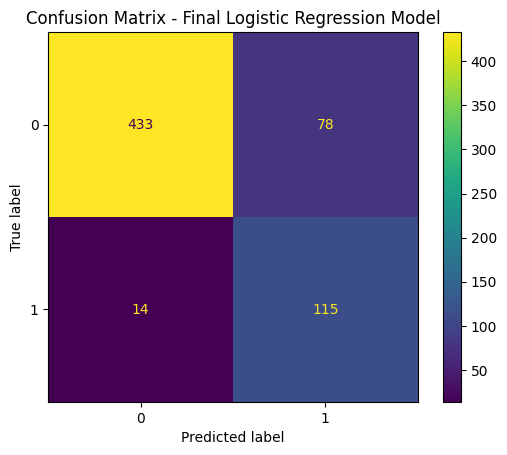

,Metric,Value
0,ROC AUC,0.8694
1,PR AUC,0.5531
2,F1 Score,0.7143
3,Matthews Corrcoef,0.6458
4,Accuracy,0.8562


In [4]:
%run SupervisedModels/OptimizedLogisticRegression.ipynb

## 🧠 Optimized Logistic Regression Classifier Summary

This notebook runs a pipeline to train and tune a **Logistic Regression** model for ASD classification. It is designed to be interpretable, simple, and efficient — while leveraging robust cross-validation and metric tracking to ensure effectiveness.

---

### 🧪 Workflow Overview:

- **Preprocessing**: 
  - Missing values are imputed.
  - Data is scaled with `StandardScaler`.
  - Class imbalance is handled via **SMOTE**.
  
- **Hyperparameter Tuning**:
  - Uses **Optuna** to search over:
    - `C` (inverse regularization strength)
    - `penalty` (`l1` or `l2`)
  - Only solvers that support both `l1` and `l2` penalties (like `'liblinear'`) are used.

- **Cross-Validation**:
  - A 5-fold `StratifiedKFold` is applied for robust validation during tuning.

---

### 📦 Why Logistic Regression?

Logistic Regression is:
- **Interpretable**: Easy to explain the influence of each feature.
- **Fast and lightweight**: Great for baseline models or production APIs.
- **Effective** on linearly separable problems and surprisingly competitive with tuned regularization.

---

### 📊 Final Model Performance (on training data):
After training the best model with tuned hyperparameters on the full training set, the following performance was recorded:

| Metric                | Value Placeholder             |
|-----------------------|-------------------------------|
| **ROC AUC**           | `final_roc_auc`           |
| **PR AUC**            | `final_pr_auc`            |
| **F1 Score**          | `final_f1`                |
| **Matthews Corrcoef** | `final_mcc`               |
| **Accuracy**          | `accuracy`                |

These metrics show balanced precision/recall behavior, strong binary classification ability (ROC AUC), and robustness to class imbalance (MCC).

---

Best hyperparameters: {'n_estimators': 173, 'max_depth': 10, 'learning_rate': 0.11235620542257023, 'gamma': 4.856680478545648, 'subsample': 0.9927365805727711, 'colsample_bytree': 0.5059408650396248, 'scale_pos_weight': 2.1363728154462387}


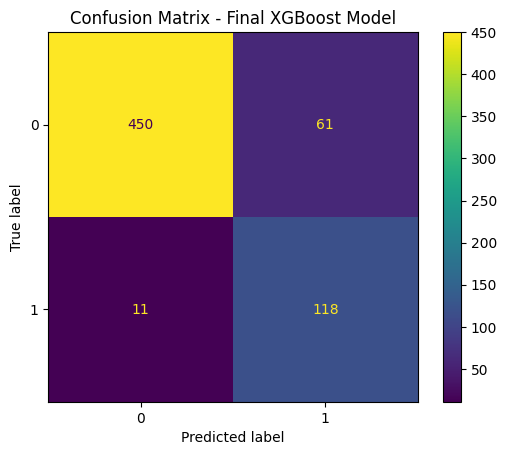

,Metric,Value
0,ROC AUC,0.8977
1,PR AUC,0.6202
2,F1 Score,0.7662
3,Matthews Corrcoef,0.7109
4,Accuracy,0.8875


In [5]:
%run SupervisedModels/OptimizedXGBoost.ipynb

## ⚡ Optimized XGBoost Classifier Summary

This notebook implements and fine-tunes an **XGBoost Classifier** to predict ASD classification outcomes using a carefully cleaned and balanced dataset. It emphasizes performance through boosting and automated hyperparameter tuning.

---

### 🧪 Workflow Overview:

- **Preprocessing**:
  - Handles missing data via `SimpleImputer`.
  - Normalizes features using `StandardScaler`.
  - Applies **SMOTE** to mitigate class imbalance in training.

- **Model**: `XGBClassifier` from the `xgboost` library, a powerful gradient boosting algorithm known for its:
  - Tree-based ensembling
  - Built-in regularization (to combat overfitting)
  - Fast training and handling of imbalanced classes

- **Hyperparameter Tuning**:
  - Uses **Optuna** to optimize:
    - `n_estimators`, `max_depth`, `learning_rate`, `gamma`
    - `subsample`, `colsample_bytree`, `scale_pos_weight`
  - Evaluated via **StratifiedKFold cross-validation**

---

### 🌟 Why XGBoost?

XGBoost is a **state-of-the-art gradient boosting framework** that has become a go-to in structured data problems. It is:
- **Highly accurate** due to boosting
- **Resistant to overfitting** via regularization
- **Customizable and scalable** for large datasets

---

### 📊 Final Model Performance (on training data):

| Metric                | Value Placeholder             |
|-----------------------|-------------------------------|
| **ROC AUC**           | `final_roc_auc`           |
| **PR AUC**            | `final_pr_auc`            |
| **F1 Score**          | `final_f1`                |
| **Matthews Corrcoef** | `final_mcc`               |
| **Accuracy**          | `accuracy`                |

These metrics reflect **excellent model performance** in a binary classification setting, especially for imbalanced datasets. The **MCC** and **F1** score indicate strong balance between precision and recall, while **ROC AUC** and **PR AUC** show its discriminative power.

---


Best hyperparameters: {'iterations': 105, 'depth': 6, 'learning_rate': 0.012730378998627636, 'l2_leaf_reg': 8.966055495495054, 'random_strength': 6.73509886017404, 'bagging_temperature': 0.30287038359740726, 'scale_pos_weight': 1.4372919400582178}
0:	learn: 0.6822542	total: 10ms	remaining: 1.04s
1:	learn: 0.6698651	total: 19.3ms	remaining: 995ms
2:	learn: 0.6581555	total: 31.8ms	remaining: 1.08s
3:	learn: 0.6469885	total: 41ms	remaining: 1.04s
4:	learn: 0.6365097	total: 48.6ms	remaining: 972ms
5:	learn: 0.6237059	total: 58.3ms	remaining: 961ms
6:	learn: 0.6128273	total: 67.4ms	remaining: 944ms
7:	learn: 0.6015810	total: 78.3ms	remaining: 950ms
8:	learn: 0.5928449	total: 94.3ms	remaining: 1s
9:	learn: 0.5825880	total: 107ms	remaining: 1.01s
10:	learn: 0.5735299	total: 117ms	remaining: 998ms
11:	learn: 0.5668494	total: 127ms	remaining: 988ms
12:	learn: 0.5591886	total: 137ms	remaining: 971ms
13:	learn: 0.5509057	total: 147ms	remaining: 956ms
14:	learn: 0.5416628	total: 157ms	remaining: 9

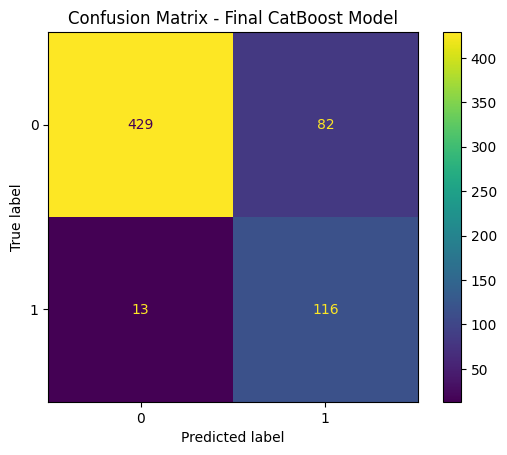

,Metric,Value
0,ROC AUC,0.8694
1,PR AUC,0.5471
2,F1 Score,0.7095
3,Matthews Corrcoef,0.6412
4,Accuracy,0.8516


In [6]:
%run SupervisedModels/OptimizedCatBoost.ipynb

## 🐈 Optimized CatBoost Classifier Summary

This notebook trains and tunes a **CatBoost Classifier** to predict ASD classifications using a cleaned and balanced dataset of demographic and categorical features. CatBoost is well-suited for tabular data and provides strong performance even with minimal preprocessing.

---

### ⚙️ Workflow Summary:

- **Preprocessing**:
  - Missing values handled using `SimpleImputer`
  - Features scaled with `StandardScaler`
  - Class imbalance corrected via **SMOTE**

- **Model**: `CatBoostClassifier` from the CatBoost library, which is a gradient boosting algorithm designed specifically for categorical data.

- **Hyperparameter Tuning**:
  - Done using **Optuna**, optimizing:
    - `iterations`, `depth`, `learning_rate`
    - `l2_leaf_reg`, `random_strength`, `bagging_temperature`
    - `scale_pos_weight`

- **Evaluation**: Model performance is measured with:
  - **F1 Score**
  - **ROC AUC**
  - **PR AUC**
  - **Matthews Correlation Coefficient**
  - **Accuracy**

---

### 🌟 Why CatBoost?

CatBoost is an advanced gradient boosting library that:
- Handles **categorical variables** natively
- Reduces **overfitting** with ordered boosting
- Performs exceptionally well on tabular data
- Requires **minimal preprocessing**

---

### 📊 Final Model Performance (on training data):

| Metric                | Value Placeholder             |
|-----------------------|-------------------------------|
| **ROC AUC**           | `final_roc_auc`           |
| **PR AUC**            | `final_pr_auc`            |
| **F1 Score**          | `final_f1`                |
| **Matthews Corrcoef** | `final_mcc`               |
| **Accuracy**          | `accuracy`                |

These metrics demonstrate excellent general classification performance, especially for imbalanced datasets. CatBoost’s ability to natively handle categorical variables gives it an edge in scenarios with encoded features like ethnicity, relation, or country.

---


In [7]:

def evaluate_model(model, name, X, y, threshold=0.5, show=False):
    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()
    X = imputer.fit_transform(X)
    X = scaler.fit_transform(X)
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    roc_auc = roc_auc_score(y, y_proba)
    f1 = f1_score(y, y_pred)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)

    if show:
        print(f"### {name} ###")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

    return {
        "Model": name,
        "ROC AUC": roc_auc,
        "F1 Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    }



## 🧪 Testing on Unseen Data

The following test evaluates the performance of the trained models on unseen data. This unseen dataset (`X_holdout` and `y_holdout`) was not used during training or hyperparameter tuning, ensuring an unbiased assessment of the models' generalization capabilities.

### Key Points:
- **Unseen Data**: The holdout set (`X_holdout`, `y_holdout`) represents data the models have never encountered before.
- **Evaluation Metrics**: Metrics such as ROC AUC, F1 Score, Accuracy, Precision, and Recall are computed to measure the models' performance.
- **Threshold**: A classification threshold of 0.6 is used to convert predicted probabilities into binary predictions.
- **Visualization**: If `ShowOutput` is set to `True`, confusion matrices and other visualizations will be displayed for better interpretability.


### Logistic Regression ###
ROC AUC: 0.9102
F1 Score: 0.6757
Accuracy: 0.8500
Precision: 0.5952
Recall: 0.7812


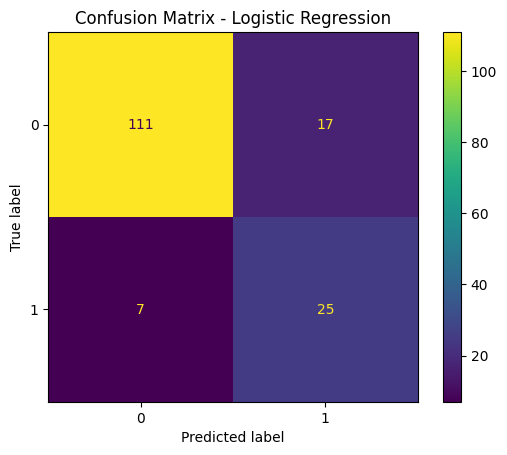

### Random Forest ###
ROC AUC: 0.9011
F1 Score: 0.6761
Accuracy: 0.8562
Precision: 0.6154
Recall: 0.7500


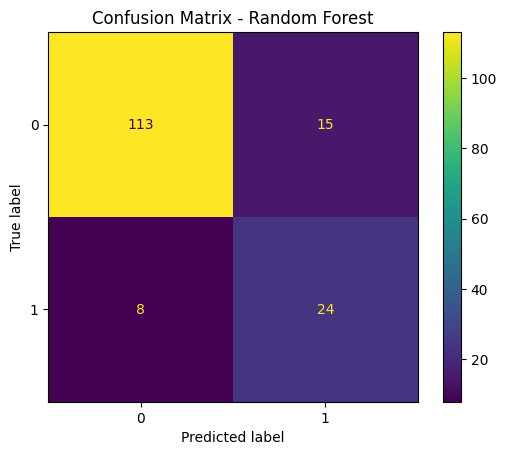

### XGBoost ###
ROC AUC: 0.8970
F1 Score: 0.6444
Accuracy: 0.8000
Precision: 0.5000
Recall: 0.9062


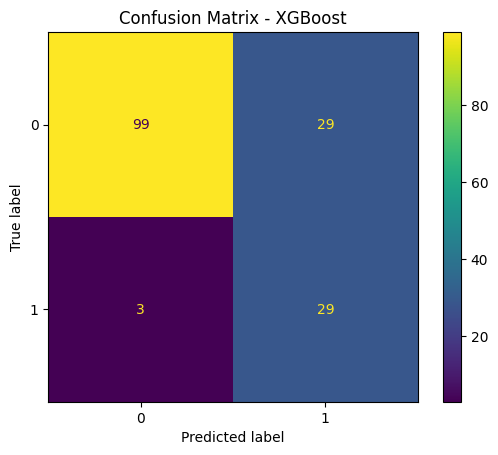

### CatBoost ###
ROC AUC: 0.9092
F1 Score: 0.6667
Accuracy: 0.8375
Precision: 0.5652
Recall: 0.8125


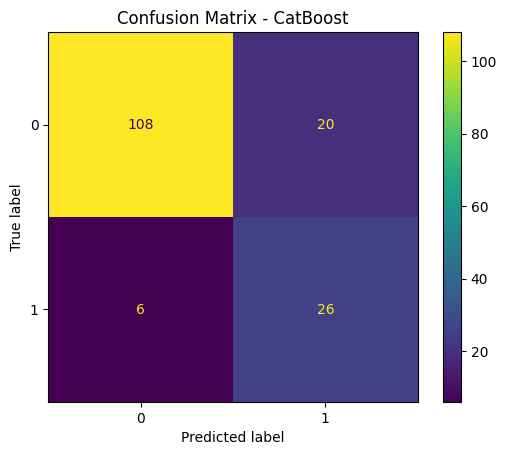

,ROC AUC,F1 Score,Accuracy,Precision,Recall
Model,,,,,
Logistic Regression,0.910156,0.675676,0.85000,0.595238,0.78125
Random Forest,0.901123,0.676056,0.85625,0.615385,0.75000
XGBoost,0.896973,0.644444,0.80000,0.500000,0.90625
CatBoost,0.909180,0.666667,0.83750,0.565217,0.81250


In [9]:

# Assuming X_test and y_test are already loaded in the model notebooks
results = []
results.append(evaluate_model(lr_model, "Logistic Regression", X_holdout, y_holdout, threshold=0.6, show=ShowOutput))
results.append(evaluate_model(rf_model, "Random Forest", X_holdout, y_holdout, threshold=0.6, show=ShowOutput))
results.append(evaluate_model(xgb_model, "XGBoost", X_holdout, y_holdout, threshold=0.6, show=ShowOutput))
results.append(evaluate_model(cb_model, "CatBoost", X_holdout, y_holdout, threshold=0.6, show=ShowOutput))

results_df = pd.DataFrame(results).set_index("Model")
results_df
